# Application for the More Electric Aircraft (MEA) conference



## Load and process

In [1]:
%matplotlib widget
import time
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
from aeromaps.core.process import create_process
from aeromaps.core.models import models_complex
from aeromaps.models.air_transport.aircraft_fleet_and_operations.fleet.fleet_model import (
    Fleet,
    AircraftParameters,
    Aircraft,
    SubCategory,
    SubcategoryParameters
)

In [2]:
process = create_process(
    models=models_complex,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)

In [3]:
# Change end year
process.parameters.end_year = 2070
process.setup(add_examples_aircraft_and_subcategory=False)

## Set up variables

### Aviation scenario

In [4]:
# Air traffic evolution

## Growth rate by category [%]
process.parameters.cagr_passenger_short_range_reference_periods = []
process.parameters.cagr_passenger_short_range_reference_periods_values = [3.0]
process.parameters.cagr_passenger_medium_range_reference_periods = []
process.parameters.cagr_passenger_medium_range_reference_periods_values = [3.0]
process.parameters.cagr_passenger_long_range_reference_periods = []
process.parameters.cagr_passenger_long_range_reference_periods_values = [3.0]
process.parameters.cagr_freight_reference_periods = []
process.parameters.cagr_freight_reference_periods_values = [3.0]

In [5]:
# Aircraft fleet

## Initialization
fleet = process.fleet

## Subcat
total_value = 47
if total_value<=25:
    total_value_short = total_value/25*100
    total_value_medium = 0
if total_value>25 and total_value<25+35:
    total_value_short = 100
    total_value_medium = (total_value-25)/35*100
fleet.categories["Short Range"].subcategories[0].parameters.share = 100-total_value_short
sr_subcat = SubCategory("SR - Electric", parameters=SubcategoryParameters(share=total_value_short/3))
fleet.categories["Short Range"].add_subcategory(subcategory=sr_subcat)
sr_subcat = SubCategory("SR - Hydrogen", parameters=SubcategoryParameters(share=total_value_short/3))
fleet.categories["Short Range"].add_subcategory(subcategory=sr_subcat)
sr_subcat = SubCategory("SR - Hybrid-lectric", parameters=SubcategoryParameters(share=total_value_short/3))
fleet.categories["Short Range"].add_subcategory(subcategory=sr_subcat)
## Subcat
fleet.categories["Medium Range"].subcategories[0].parameters.share = 100-total_value_medium
mr_subcat = SubCategory("MR - Hydrogen", parameters=SubcategoryParameters(share=total_value_medium/2))
fleet.categories["Medium Range"].add_subcategory(subcategory=mr_subcat)
mr_subcat = SubCategory("MR - Hybrid-electric", parameters=SubcategoryParameters(share=total_value_medium/2))
fleet.categories["Medium Range"].add_subcategory(subcategory=mr_subcat)

## Basic Short Range
short_range_aircraft_params = AircraftParameters(
    entry_into_service_year=2035,
    consumption_evolution=-20.0,
    nox_evolution=-75.0,
    soot_evolution=-100.0,
    doc_non_energy_evolution=0.0,
    cruise_altitude=12000.0,
)
short_range_aircraft = Aircraft(
    "New Short-range Aircraft - Conventional",
    parameters=short_range_aircraft_params,
    energy_type="DROP_IN_FUEL",
)
fleet.categories["Short Range"].subcategories[0].add_aircraft(aircraft=short_range_aircraft)


## New Short Range - Electric
short_range_aircraft_new_params = AircraftParameters(
    entry_into_service_year=2040,
    consumption_evolution=50.0,
    nox_evolution=-50.0,
    soot_evolution=-50.0,
    doc_non_energy_evolution=10.0,
    cruise_altitude=12000.0,
)
short_range_aircraft_new = Aircraft(
    "New Short-range Aircraft - Electric",
    parameters=short_range_aircraft_new_params,
    energy_type="ELECTRIC",
)
fleet.categories["Short Range"].subcategories[1].add_aircraft(aircraft=short_range_aircraft_new)


## New Short Range - Hydrogen
short_range_aircraft_new_params = AircraftParameters(
    entry_into_service_year=2035,
    consumption_evolution=5.0,
    nox_evolution=-50.0,
    soot_evolution=-50.0,
    doc_non_energy_evolution=10.0,
    cruise_altitude=12000.0,
)
short_range_aircraft_new = Aircraft(
    "New Short-range Aircraft - Hydrogen",
    parameters=short_range_aircraft_new_params,
    energy_type="HYDROGEN",
)
fleet.categories["Short Range"].subcategories[2].add_aircraft(aircraft=short_range_aircraft_new)

## New Short Range - Hybrid-electric
short_range_aircraft_new_params = AircraftParameters(
    entry_into_service_year=2030,
    consumption_evolution=-10.0,
    nox_evolution=-50.0,
    soot_evolution=-50.0,
    doc_non_energy_evolution=10.0,
    cruise_altitude=12000.0,
    hybridization_factor=0.4,
)
short_range_aircraft_new = Aircraft(
    "New Short-range Aircraft - Hybrid-electric",
    parameters=short_range_aircraft_new_params,
    energy_type="HYBRID_ELECTRIC",
)
fleet.categories["Short Range"].subcategories[3].add_aircraft(aircraft=short_range_aircraft_new)


## Medium Range
medium_range_aircraft_params = AircraftParameters(
    entry_into_service_year=2035,
    consumption_evolution=-20.0,
    nox_evolution=0.0,
    soot_evolution=0.0,
    doc_non_energy_evolution=0.0,
    cruise_altitude=12000.0,
)
medium_range_aircraft = Aircraft(
    "New Medium-range Aircraft", parameters=medium_range_aircraft_params, energy_type="DROP_IN_FUEL"
)
fleet.categories["Medium Range"].subcategories[0].add_aircraft(aircraft=medium_range_aircraft)

## New Medium Range - Electric
medium_range_aircraft_new_params = AircraftParameters(
    entry_into_service_year=2040,
    consumption_evolution=50.0,
    nox_evolution=-50.0,
    soot_evolution=-50.0,
    doc_non_energy_evolution=10.0,
    cruise_altitude=12000.0,
)
medium_range_aircraft_new = Aircraft(
    "New Medium-range Aircraft - Electric",
    parameters=medium_range_aircraft_new_params,
    energy_type="ELECTRIC",
)
fleet.categories["Medium Range"].subcategories[1].add_aircraft(aircraft=medium_range_aircraft_new)

## New Medium Range - Hydrogen
medium_range_aircraft_new_params = AircraftParameters(
    entry_into_service_year=2030,
    consumption_evolution=-10.0,
    nox_evolution=-50.0,
    soot_evolution=-50.0,
    doc_non_energy_evolution=10.0,
    cruise_altitude=12000.0,
)
medium_range_aircraft_new = Aircraft(
    "New Medium-range Aircraft - Hydrogen",
    parameters=medium_range_aircraft_new_params,
    energy_type="HYDROGEN",
)
fleet.categories["Medium Range"].subcategories[1].add_aircraft(aircraft=medium_range_aircraft_new)

## New Medium Range - Hybrid-electric
medium_range_aircraft_new_params = AircraftParameters(
    entry_into_service_year=2030,
    consumption_evolution=-10.0,
    nox_evolution=-50.0,
    soot_evolution=-50.0,
    doc_non_energy_evolution=10.0,
    cruise_altitude=12000.0,
    hybridization_factor=0.4,
)
medium_range_aircraft_new = Aircraft(
    "New Medium-range Aircraft - Hybrid-electric",
    parameters=medium_range_aircraft_new_params,
    energy_type="HYBRID_ELECTRIC",
)

fleet.categories["Medium Range"].subcategories[2].add_aircraft(aircraft=medium_range_aircraft_new)


## Long Range
long_range_aircraft_params = AircraftParameters(
    entry_into_service_year=2035,
    consumption_evolution=-20.0,
    nox_evolution=0.0,
    soot_evolution=0.0,
    doc_non_energy_evolution=0.0,
    cruise_altitude=12000.0,
    hybridization_factor=0.,
)
long_range_aircraft = Aircraft(
    "New Long-range Aircraft", parameters=long_range_aircraft_params, energy_type="DROP_IN_FUEL"
)
fleet.categories["Long Range"].subcategories[0].add_aircraft(aircraft=long_range_aircraft)


## Fleet renewal
fleet.categories["Short Range"].parameters.life = 20
fleet.categories["Medium Range"].parameters.life = 20
fleet.categories["Long Range"].parameters.life = 20

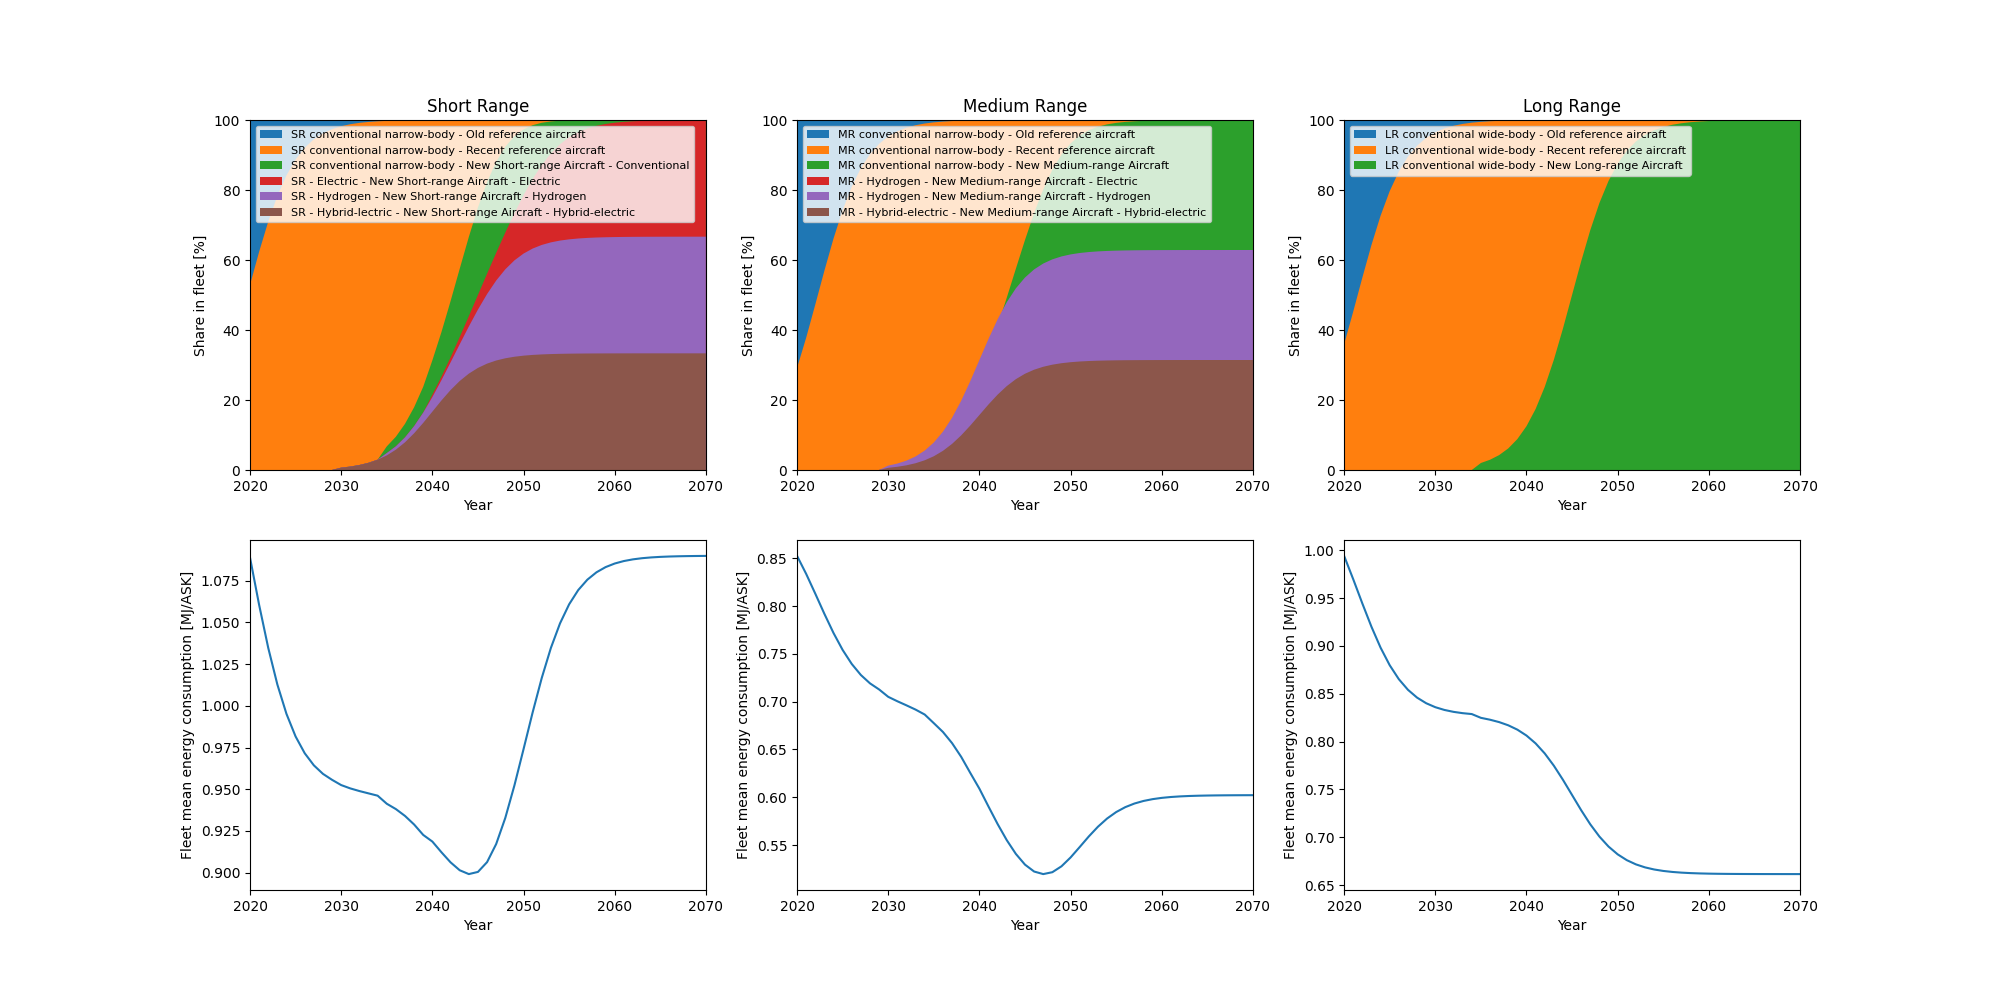

In [6]:
fleet_model = process.fleet_model
fleet_model.compute()
fleet_model.plot()

In [7]:
# Aircraft fleet and operation evolution - Aircraft load factor

## Aircraft load factor in 2050 [%]
process.parameters.load_factor_end_year = 89  # 2019 value: 82.399312

In [8]:
# Aircraft fleet and operation evolution - Operations

## Values for setting the logistic function
process.parameters.operations_final_gain = 8.0  # [%]
process.parameters.operations_start_year = 2025
process.parameters.operations_duration = 25.0

In [9]:
# Aircraft energy - Introduction of alternative drop-in fuels

## Share of alternative fuels in the drop-in fuel mix (the rest being supplemented by kerosene) [%]
process.parameters.biofuel_share_reference_years = []
process.parameters.biofuel_share_reference_years_values = [0.0]
process.parameters.electrofuel_share_reference_years = []
process.parameters.electrofuel_share_reference_years_values = [0.0]

In [10]:
# Various environmental settings

## Share of biofuel production pathways (the rest being completed by AtJ processes) [%]
process.parameters.biofuel_hefa_fog_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.biofuel_hefa_fog_share_reference_years_values = [100, 0.7, 0.7, 0.7]
process.parameters.biofuel_hefa_others_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.biofuel_hefa_others_share_reference_years_values = [0.0, 3.8, 3.8, 3.8]
process.parameters.biofuel_ft_others_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.biofuel_ft_others_share_reference_years_values = [0.0, 76.3, 76.3, 76.3]
process.parameters.biofuel_ft_msw_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.biofuel_ft_msw_share_reference_years_values = [0.0, 7.4, 7.4, 7.4]

## Emission factors for electricity (2019 value: 429 gCO2/kWh)
process.parameters.electricity_emission_factor_reference_years = []
process.parameters.electricity_emission_factor_reference_years_values = [10.0]

## Share of hydrogen production pathways (the rest being completed by production via coal without CCS) [%]
## Distribution in 2019: Gas without CCS (71%), Coal without CCS (27%), Electrolysis (2%), Others with CCS (0%), Co-products not taken into account
process.parameters.hydrogen_electrolysis_share_reference_years = []
process.parameters.hydrogen_electrolysis_share_reference_years_values = [100]
process.parameters.hydrogen_gas_ccs_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.hydrogen_gas_ccs_share_reference_years_values = [0, 0, 0, 0]
process.parameters.hydrogen_coal_ccs_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.hydrogen_coal_ccs_share_reference_years_values = [0, 0, 0, 0]
process.parameters.hydrogen_gas_share_reference_years = []
process.parameters.hydrogen_gas_share_reference_years_values = [0]

## Compute

In [11]:
t1 = time.time()
process.compute()
t2 = time.time()
print("Computation time:", np.round(t2 - t1, 2), "s")

/Users/s.delbecq/PycharmProjects/AeroMAPS/aeromaps/models/base.py:73: UserWarning: Warning Message - Model name: biofuel_production - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
/Users/s.delbecq/PycharmProjects/AeroMAPS/aeromaps/models/base.py:73: UserWarning: Warning Message - Model name: biofuel_production - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
/Users/s.delbecq/PycharmProjects/AeroMAPS/aeromaps/models/base.py:73: UserWarning: Warning Message - Model name: biofuel_production - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to th

Computation time: 1.78 s


## Results

In [12]:
process.write_excel(file_name="aeromaps_data.xlsx")

### Main results

In [13]:
print(
    "CO2 emissions in 2050:",
    round(process.data["climate_outputs"]["co2_emissions"][2050], 0),
    "MtCO2",
)
print(
    "Cumulative CO2 emissions between 2020 and 2050:",
    round(process.data["vector_outputs"]["cumulative_co2_emissions"][2050], 1),
    "GtCO2",
)
print(
    "Energy consumption in 2050:",
    round(process.data["vector_outputs"]["energy_consumption"][2050]/10**12, 1),
    "EJ",
)
print(
    "CO2 emissions in 2070:",
    round(process.data["climate_outputs"]["co2_emissions"][2070], 0),
    "MtCO2",
)

CO2 emissions in 2050: 1054.0 MtCO2
Cumulative CO2 emissions between 2020 and 2050: 32.3 GtCO2
Energy consumption in 2050: 16.5 EJ
CO2 emissions in 2070: 1578.0 MtCO2


### Plots

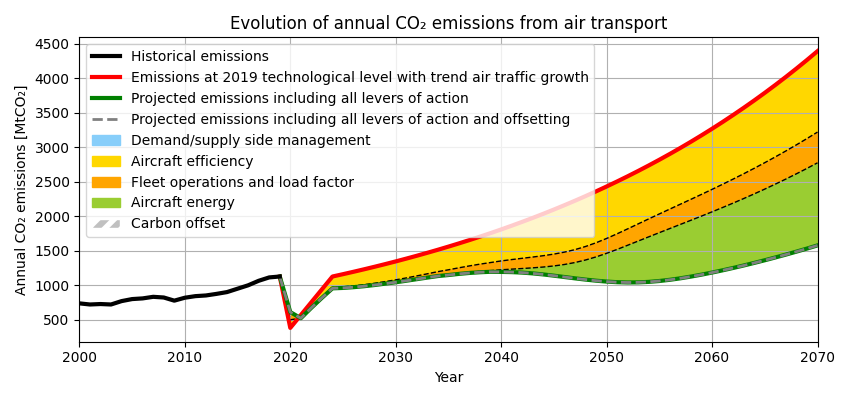

In [14]:
process.plot("air_transport_co2_emissions")

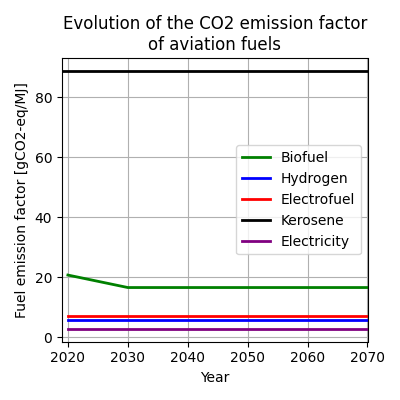

In [15]:
process.plot("emission_factor_per_fuel")

# Comparison

In [16]:
mea_data_df = read_csv("data/mea_data.csv", delimiter=";")
mea_data = mea_data_df.values
mea_data_reference = mea_data[:, 1]
mea_data_electric = mea_data[:, 2]
mea_data_electric_low = mea_data[:, 3]
mea_data_electric_high = mea_data[:, 4]
mea_data_hybridelectric = mea_data[:, 5]
mea_data_hybridelectric_low = mea_data[:, 6]
mea_data_hybridelectric_high = mea_data[:, 7]
mea_data_hydrogen = mea_data[:, 8]
mea_data_hydrogen_low = mea_data[:, 9]
mea_data_hydrogen_high = mea_data[:, 10]
mea_data_mix = mea_data[:, 11]

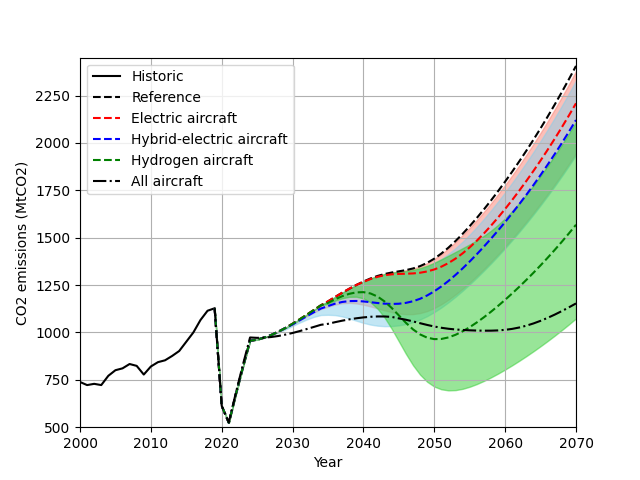

In [17]:
data_years_total = list(range(1940,2101))

fig, ax = plt.subplots()
ax.plot(
    process.data["years"]["historic_years"],
    process.data["climate_outputs"]["co2_emissions"][2000-1940:2000-1940+20],
    color="black",
    label="Historic",
    linestyle="-",
)

ax.plot(
    process.data["years"]["prospective_years"],
    mea_data_reference,
    color="black",
    label="Reference",
    linestyle="--",
)

ax.plot(
    process.data["years"]["prospective_years"],
    mea_data_electric,
    color="red",
    label="Electric aircraft",
    linestyle="--",
)
ax.fill_between(process.data["years"]["prospective_years"],mea_data_electric_low, mea_data_electric_high, color='salmon', alpha=0.5)

ax.plot(
    process.data["years"]["prospective_years"],
    mea_data_hybridelectric,
    color="blue",
    label="Hybrid-electric aircraft",
    linestyle="--",
)
ax.fill_between(process.data["years"]["prospective_years"], mea_data_hybridelectric_low, mea_data_hybridelectric_high, color='skyblue', alpha=0.5)

ax.plot(
    process.data["years"]["prospective_years"],
    mea_data_hydrogen,
    color="green",
    label="Hydrogen aircraft",
    linestyle="--",
)
ax.fill_between(process.data["years"]["prospective_years"], mea_data_hydrogen_low, mea_data_hydrogen_high, color='limegreen', alpha=0.5)

ax.plot(
    process.data["years"]["prospective_years"],
    mea_data_mix,
    color="black",
    label="All aircraft",
    linestyle="-.",
)

ax.set(
    xlabel="Year",
    ylabel="CO2 emissions (MtCO2)",
)
ax.grid()
plt.xlim(2000, 2070)
plt.ylim(500, 2450)
plt.legend()
plt.show()